In [12]:
import os
if not os.path.exists('error_data'):
    os.makedirs('error_data')

In [13]:
import numpy as np
import pandas as pd

# read_csv usually handles types smarter, but best to be explicit
df = pd.read_csv('error_data/State0.csv', header=None, dtype=str)
data_zeros = df.values.flatten()

df = pd.read_csv('error_data/State1.csv', header=None, dtype=str)
data_ones = df.values.flatten()


--- Starting Calibration ---
Calibrating |0> state...
Inferring Qubit 1 for State |0>
Given Lambda preparing 0): success rate = 0.9950


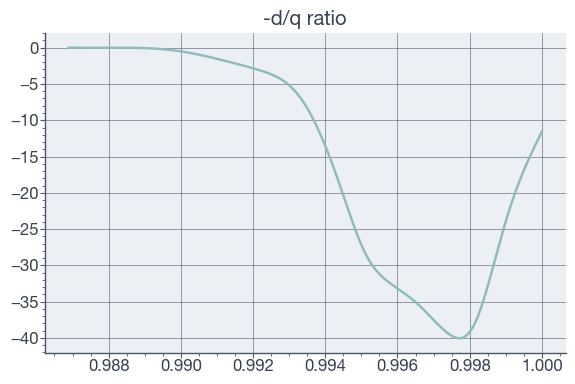

Final Accepted Posterior Lambdas
M: 40.0576 Maximizer: 0.997716 pi_obs = 189.056 pi_Q(prior) = 4.71961
Accepted N: 1438 (3.6%)
Posterior Mean for preparing 0: success rate ~ 0.996697


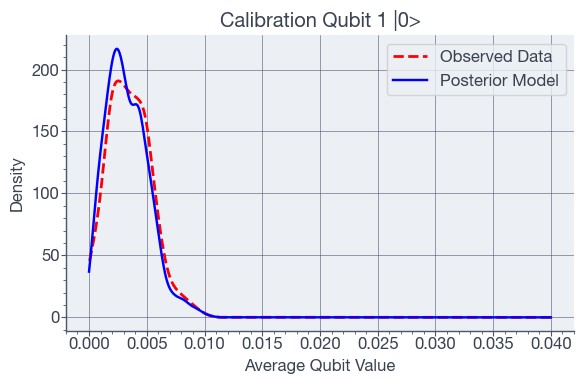

Inferring Qubit 0 for State |0>
Given Lambda preparing 0): success rate = 0.9950


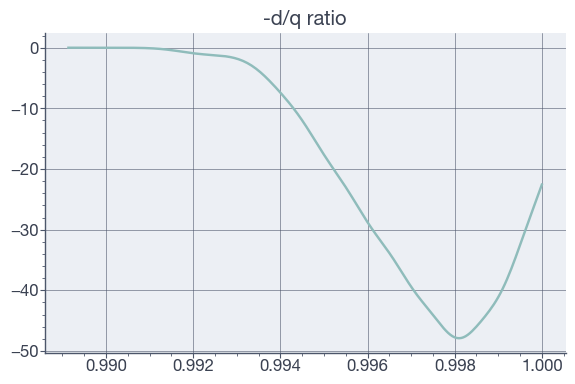

Final Accepted Posterior Lambdas
M: 47.9036 Maximizer: 0.998099 pi_obs = 218.817 pi_Q(prior) = 4.56785
Accepted N: 1251 (3.1%)
Posterior Mean for preparing 0: success rate ~ 0.997415


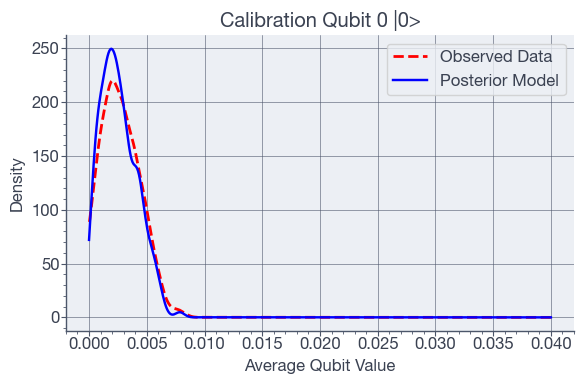

Calibrating |1> state...
Inferring Qubit 1 for State |1>
Given Lambda preparing 1): success rate = 0.9950


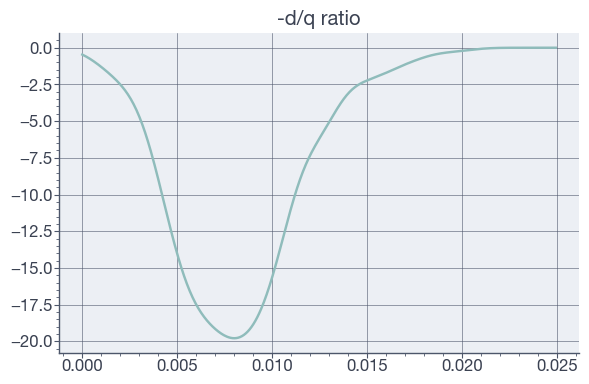

Final Accepted Posterior Lambdas
M: 19.7888 Maximizer: 0.00799767 pi_obs = 129.591 pi_Q(prior) = 6.54868
Accepted N: 2412 (6.0%)
Posterior Mean for preparing 1: success rate ~ 0.991862


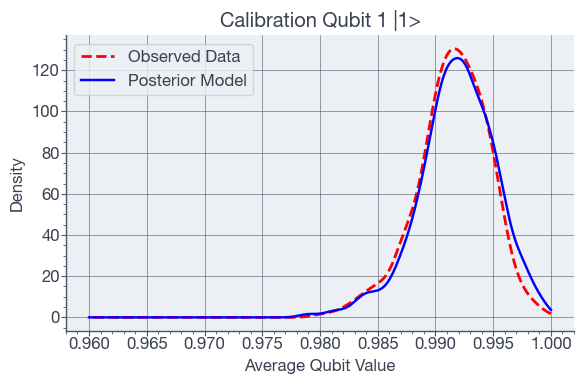

Inferring Qubit 0 for State |1>
Given Lambda preparing 1): success rate = 0.9950


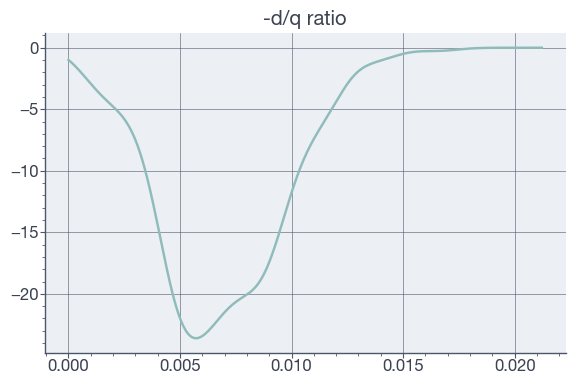

/Users/chardiol/Desktop/Pawsey!/UnNoiseCompile/.venv/lib/python3.11/site-packages/scipy/optimize/_numdiff.py:686: RuntimeWarning: invalid value encountered in subtract
  df = [f_eval - f0 for f_eval in f_evals]


Final Accepted Posterior Lambdas
M: 23.6064 Maximizer: 0.00570571 pi_obs = 140.068 pi_Q(prior) = 5.93347
Accepted N: 2099 (5.2%)
Posterior Mean for preparing 1: success rate ~ 0.993073


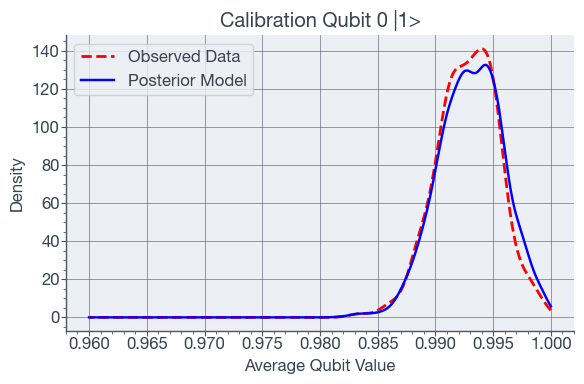

Inference Complete.


In [ ]:
from measfilter import SplitMeasFilter  # Assuming class is saved here

# Initialize
# Qubit order must match your bitstrings (e.g., '01' -> q1=0, q0=1 or vice versa depending on endianness)
# Standard Qiskit/Braket is usually Little Endian (Rightmost is q0)
qubits = [1, 0] 
my_filter = SplitMeasFilter(qubit_order=qubits, file_address='error_data/')

print("\n--- Starting Calibration ---")

## providing the true errors which I used to simulate the data in samples/CZ_test.ipynb
my_filter.params = {
    0: {'pm1p0': 0.0027, 'pm0p1': 0.0072},  # Qubit 0: Expect 1% error on 0, 2% error on 1
    1: {'pm1p0': 0.0035, 'pm0p1': 0.0085}   # Qubit 1: Expect 5% error (Standard/Noisy)
}

# Pass 1: Calibrate Error on State |0>
print("Calibrating |0> state...")
my_filter.data = data_zeros
my_filter.inference(prep_state='0', nPrior=40000, Priod_sd= 0.1, shots_per_point = 1024)

# Pass 2: Calibrate Error on State |1>
print("Calibrating |1> state...")
my_filter.data = data_ones
my_filter.inference(prep_state='1', nPrior=40000, Priod_sd= 0.1, shots_per_point = 1024)

print("Inference Complete.")


--- Error Analysis ---


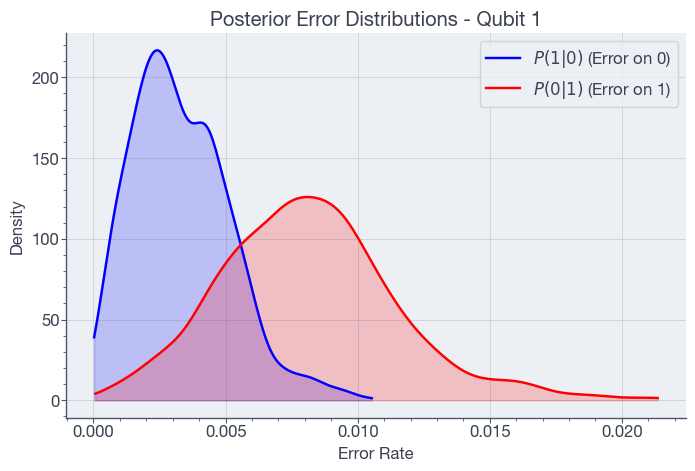

--- Qubit 1 Summary ---
Error on |0>: 0.0033 (95% CI: 0.0004 - 0.0077)
Error on |1>: 0.0081 (95% CI: 0.0021 - 0.0160)
------------------------------


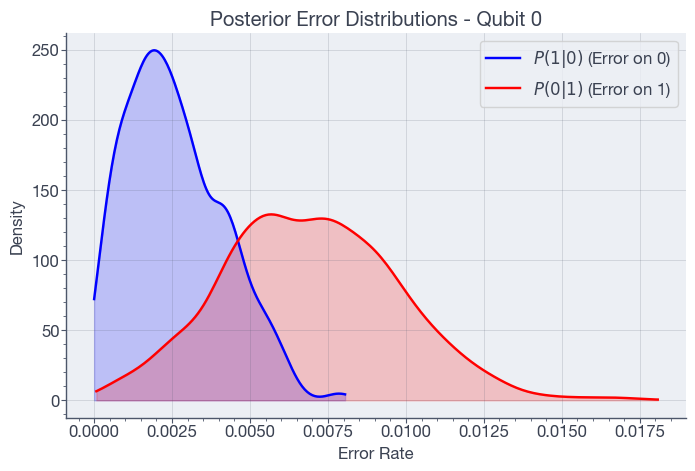

--- Qubit 0 Summary ---
Error on |0>: 0.0026 (95% CI: 0.0002 - 0.0059)
Error on |1>: 0.0069 (95% CI: 0.0017 - 0.0125)
------------------------------


In [23]:
# ---------------------------------------------------------
# ANALYZE RESULTS
# ---------------------------------------------------------
print("\n--- Error Analysis ---")
# This will pop up the plots and print the error %
stats = my_filter.error_distributions(plotting=True, save_plots= True)

In [16]:
# # ---------------------------------------------------------
# # 4. MITIGATE AN EXPERIMENT
# # ---------------------------------------------------------
# print("\n--- Mitigation Demo ---")

# # Assume you ran a Bell State experiment and got these counts:
# noisy_experiment_counts = {'00': 480, '01': 35, '10': 45, '11': 440}
# print(f"Noisy Counts:     {noisy_experiment_counts}")

# # Apply the filter
# clean_counts = my_filter.filter_mean(noisy_experiment_counts)

# # Round for readability
# clean_counts_readable = {k: round(v, 1) for k, v in clean_counts.items()}
# print(f"Mitigated Counts: {clean_counts_readable}")